# BÀI TẬP THỰC HÀNH: GRADIENT DESCENT VỚI CÁC HÀM SỐ KHÁC NHAU

## Mục tiêu
- Hiểu sâu về thuật toán Gradient Descent
- Thực hành triển khai thuật toán từ đầu
- So sánh hiệu quả của các learning rate khác nhau
- Phân tích quá trình hội tụ trên các hàm số khác nhau

## Lý thuyết cơ bản

Gradient Descent là thuật toán tối ưu hóa cơ bản nhất, sử dụng công thức cập nhật:

$$x_{new} = x_{old} - \alpha \nabla f(x_{old})$$

Trong đó:
- $\alpha$ là learning rate (tốc độ học)
- $\nabla f(x)$ là gradient (đạo hàm) của hàm số tại điểm $x$

### Các yếu tố ảnh hưởng đến hiệu quả:
1. **Learning rate ($\alpha$)**: Quá lớn → nhảy dốc, quá nhỏ → hội tụ chậm
2. **Điểm khởi tạo**: Ảnh hưởng đến cực trị địa phương tìm được
3. **Dạng hàm số**: Lồi vs không lồi, smooth vs non-smooth


In [8]:
!pip install seaborn

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Cấu hình matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")


## Phần 1: Triển khai Gradient Descent cơ bản

### Bài tập 1.1: Hàm bậc hai đơn giản
Cho hàm số $f(x) = (x-3)^2 + 2$

**Yêu cầu:**
1. Tính đạo hàm của hàm số
2. Triển khai thuật toán Gradient Descent
3. Tìm điểm cực tiểu với các learning rate khác nhau

**Lý thuyết:**
Đây là hàm lồi đơn giản có cực tiểu toàn cục tại $x^* = 3$ với $f(x^*) = 2$.
Đạo hàm: $f'(x) = 2(x-3)$

Điều kiện hội tụ: $0 < \alpha < \frac{2}{L}$ với $L$ là Lipschitz constant của gradient.


In [1]:
def f1(x):
    """Hàm số f(x) = (x-3)^2 + 2"""
    return (x - 3)**2 + 2

def df1_dx(x):
    """Đạo hàm f'(x) = 2(x-3)"""
    # TODO: Đạo hàm của (x-3)^2 + 2 là 
    return 2*x -6

def gradient_descent_1d(f, df_dx, x_init, learning_rate, num_iterations, tolerance=1e-8):
    """
    Thuật toán Gradient Descent cho hàm 1 biến
    
    Args:
        f: Hàm mục tiêu
        df_dx: Đạo hàm của hàm mục tiêu
        x_init: Điểm khởi tạo
        learning_rate: Tốc độ học
        num_iterations: Số vòng lặp tối đa
        tolerance: Ngưỡng dừng (khi gradient đủ nhỏ)
    
    Returns:
        history: Lịch sử các điểm x, giá trị hàm số và gradient
    """
    x = x_init
    history = {
        'x': [x], 
        'f': [f(x)], 
        'gradient': [df_dx(x)],
        'step_size': []
    }
    
    for i in range(num_iterations):
        # TODO: Tính gradient tại điểm hiện tại
        gradient = df_dx(x)
        
        # Kiểm tra điều kiện dừng
        if abs(gradient) < tolerance:
            print(f"Hội tụ tại iteration {i+1}, gradient = {gradient:.2e}")
            break
            
        # TODO: Cập nhật x theo công thức: x_new = x_old - learning_rate * gradient
        x_new = x - learning_rate*gradient
        step_size = abs(x_new - x)
        
        x = x_new
        
        # Lưu lịch sử
        history['x'].append(x)
        history['f'].append(f(x))
        history['gradient'].append(gradient)
        history['step_size'].append(step_size)
    
    return history

# Test với hàm đơn giản
print("Test Gradient Descent cơ bản:")
history_test = gradient_descent_1d(f1, df1_dx, x_init=0, learning_rate=0.1, num_iterations=20)
print(f"Điểm cuối: x = {history_test['x'][-1]:.6f}")
print(f"Giá trị hàm: f(x) = {history_test['f'][-1]:.6f}")
print(f"Gradient cuối: {history_test['gradient'][-1]:.2e}")


Test Gradient Descent cơ bản:
Điểm cuối: x = 2.965412
Giá trị hàm: f(x) = 2.001196
Gradient cuối: -8.65e-02


### Bài tập 1.2: Phân tích chi tiết các Learning Rate

**Mục tiêu:** Hiểu sâu về ảnh hưởng của learning rate đến quá trình hội tụ


Hội tụ tại iteration 24, gradient = -4.22e-09
Hội tụ tại iteration 2, gradient = 0.00e+00
Hội tụ tại iteration 41, gradient = -8.02e-09


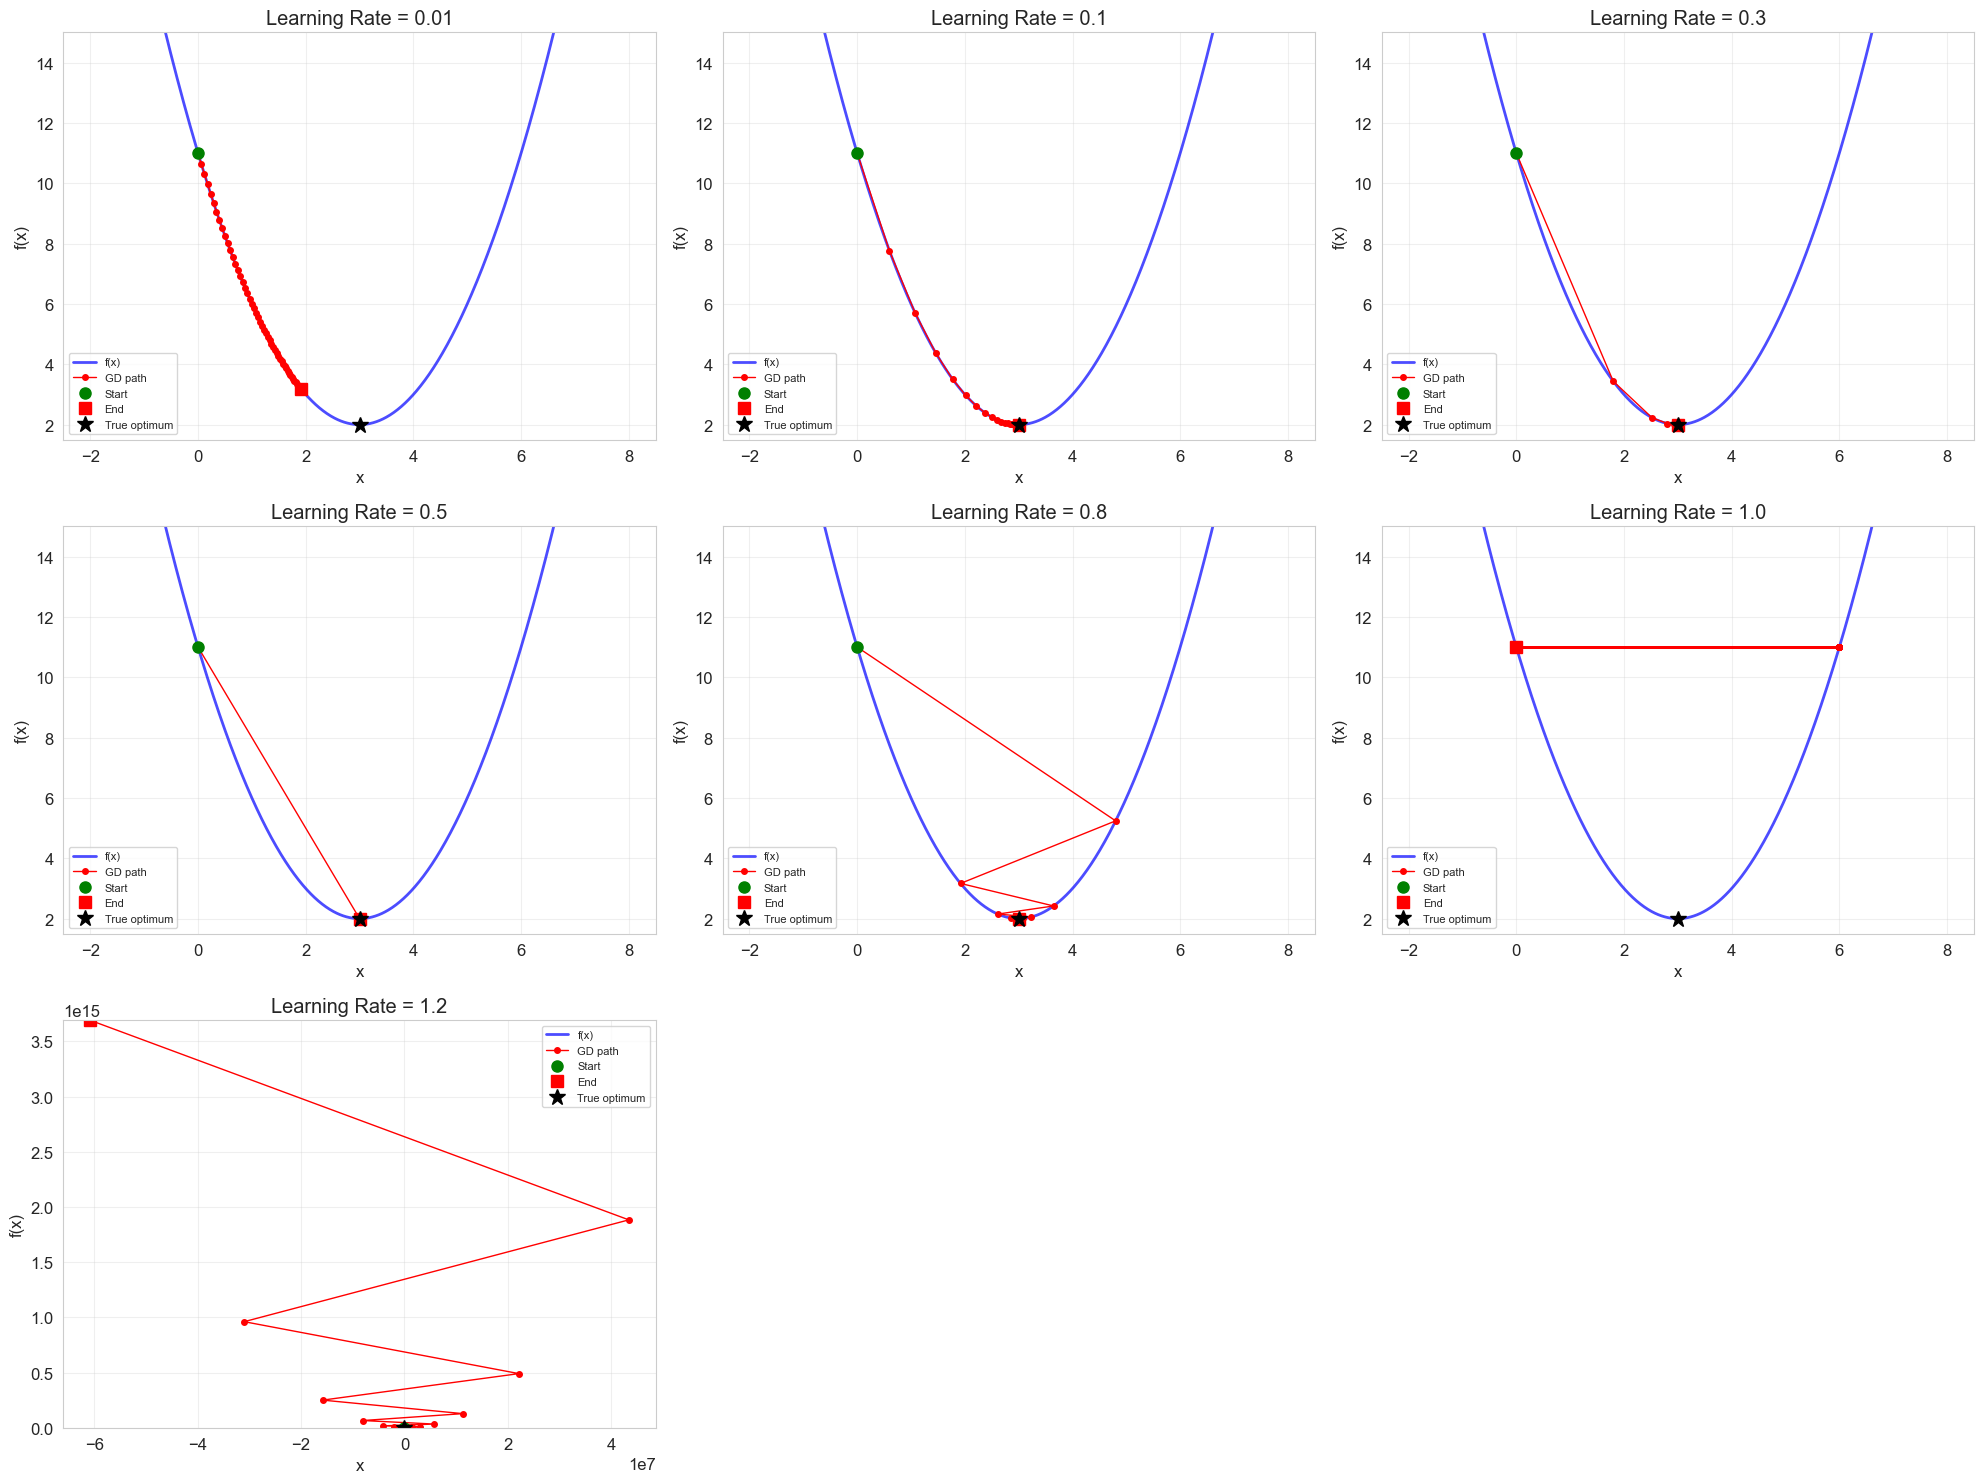


PHÂN TÍCH KẾT QUẢ LEARNING RATE
LR     Final X      Error        Iterations   Converged   
--------------------------------------------------------------------------------
0.01   1.907491     1.09e+00     50           0           
0.1    2.999957     4.28e-05     50           0           
0.3    3.000000     2.11e-09     23           1           
0.5    3.000000     0.00e+00     1            1           
0.8    3.000000     4.01e-09     40           1           
1.0    0.000000     3.00e+00     50           0           
1.2    -60746745.719293 6.07e+07     50           0           
--------------------------------------------------------------------------------


In [11]:
# Thử nghiệm với các learning rate khác nhau
learning_rates = [0.01, 0.1, 0.3, 0.5, 0.8, 1.0, 1.2]
x_init = 0
num_iterations = 50

plt.figure(figsize=(20, 15))

# Vẽ hàm số gốc
x_range = np.linspace(-2, 8, 1000)
y_range = f1(x_range)

results_summary = []

for i, lr in enumerate(learning_rates):
    plt.subplot(3, 3, i+1)
    plt.plot(x_range, y_range, 'b-', linewidth=2, label='f(x)', alpha=0.7)
    
    # Chạy gradient descent
    history = gradient_descent_1d(f1, df1_dx, x_init, lr, num_iterations)
    
    # Vẽ quá trình hội tụ
    plt.plot(history['x'], history['f'], 'ro-', markersize=4, linewidth=1, label='GD path')
    plt.plot(history['x'][0], history['f'][0], 'go', markersize=8, label='Start')
    plt.plot(history['x'][-1], history['f'][-1], 'rs', markersize=8, label='End')
    
    # Vẽ điểm tối ưu thực
    plt.plot(3, 2, 'k*', markersize=12, label='True optimum')
    
    plt.title(f'Learning Rate = {lr}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.ylim(1.5, max(15, max(history['f'])))
    
    # Lưu kết quả để phân tích
    final_error = abs(history['x'][-1] - 3)
    convergence_rate = len(history['x']) - 1
    results_summary.append({
        'lr': lr,
        'final_x': history['x'][-1],
        'final_error': final_error,
        'iterations': convergence_rate,
        'converged': final_error < 1e-6
    })

plt.tight_layout()
plt.show()

# Phân tích kết quả
print("\n" + "="*80)
print("PHÂN TÍCH KẾT QUẢ LEARNING RATE")
print("="*80)
print(f"{'LR':<6} {'Final X':<12} {'Error':<12} {'Iterations':<12} {'Converged':<12}")
print("-"*80)
for result in results_summary:
    print(f"{result['lr']:<6} {result['final_x']:<12.6f} {result['final_error']:<12.2e} "
          f"{result['iterations']:<12} {result['converged']:<12}")
print("-"*80)


## Phần 2: Gradient Descent cho Hàm Đa Biến

### Bài tập 2.1: Hàm bậc hai đa biến (Quadratic Function)

**Lý thuyết:**
Hàm bậc hai đa biến có dạng tổng quát:
$$f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^T A \mathbf{x} + \mathbf{b}^T\mathbf{x} + c$$

Gradient: $\nabla f(\mathbf{x}) = A\mathbf{x} + \mathbf{b}$

**Ví dụ cụ thể:** $f(x_1, x_2) = x_1^2 + 2x_2^2 + x_1x_2 - 4x_1 - 6x_2 + 5$

Gradient: 
- $\frac{\partial f}{\partial x_1} = 2x_1 + x_2 - 4$
- $\frac{\partial f}{\partial x_2} = 4x_2 + x_1 - 6$

**Mục tiêu:** Tìm điểm cực tiểu và phân tích ảnh hưởng của condition number của ma trận Hessian.


In [7]:
def f2(x):
    """Hàm bậc hai đa biến: f(x1,x2) = x1^2 + 2*x2^2 + x1*x2 - 4*x1 - 6*x2 + 5"""
    x1, x2 = x[0], x[1]
    return x1**2 + 2*x2**2 + x1*x2 - 4*x1 - 6*x2 + 5

def grad_f2(x):
    """Gradient của f2"""
    x1, x2 = x[0], x[1]
    # TODO: Gradient của f(x1,x2) = x1^2 + 2*x2^2 + x1*x2 - 4*x1 - 6*x2 + 5
    # ∂f/∂x1 = 2*x1 + x2 - 4
    # ∂f/∂x2 = 4*x2 + x1 - 6
    grad_x1 = 2*x1 + x2 - 4
    grad_x2 = 4*x2 + x1 - 6
    return np.array([grad_x1, grad_x2])

def gradient_descent_2d(f, grad_f, x_init, learning_rate, num_iterations, tolerance=1e-8):
    """
    Gradient Descent cho hàm 2 biến
    
    Args:
        f: Hàm mục tiêu
        grad_f: Gradient của hàm mục tiêu
        x_init: Điểm khởi tạo [x1, x2]
        learning_rate: Tốc độ học
        num_iterations: Số vòng lặp tối đa
        tolerance: Ngưỡng dừng
    
    Returns:
        history: Lịch sử quá trình tối ưu
    """
    x = np.array(x_init, dtype=float)
    history = {
        'x': [x.copy()],
        'f': [f(x)],
        'gradient': [grad_f(x).copy()],
        'gradient_norm': [np.linalg.norm(grad_f(x))]
    }
    
    for i in range(num_iterations):
        # TODO: Tính gradient tại điểm hiện tại
        gradient = grad_f(x)
        gradient_norm = np.linalg.norm(gradient)
        
        # Kiểm tra điều kiện dừng
        if gradient_norm < tolerance:
            print(f"Hội tụ tại iteration {i+1}, ||gradient|| = {gradient_norm:.2e}")
            break
        
        # TODO: Cập nhật x theo công thức: x_new = x_old - learning_rate * gradient
        x_new = x - learning_rate *gradient
        x = x_new
        
        # Lưu lịch sử
        history['x'].append(x.copy())
        history['f'].append(f(x))
        history['gradient'].append(gradient.copy())
        history['gradient_norm'].append(gradient_norm)
    
    return history

# Test hàm 2D
print("Test Gradient Descent 2D:")
x_init = [0, 0]
history_2d = gradient_descent_2d(f2, grad_f2, x_init, learning_rate=0.1, num_iterations=100)
print(f"Điểm cuối: x = [{history_2d['x'][-1][0]:.6f}, {history_2d['x'][-1][1]:.6f}]")
print(f"Giá trị hàm: f(x) = {history_2d['f'][-1]:.6f}")
print(f"Norm gradient: ||∇f|| = {history_2d['gradient_norm'][-1]:.2e}")

# Tính nghiệm chính xác bằng giải tích
# Giải hệ phương trình ∇f = 0
A = np.array([[2, 1], [1, 4]])
b = np.array([-4, -6])
x_optimal = np.linalg.solve(A, -b)
f_optimal = f2(x_optimal)
print(f"\nNghiệm chính xác: x* = [{x_optimal[0]:.6f}, {x_optimal[1]:.6f}]")
print(f"Giá trị tối ưu: f(x*) = {f_optimal:.6f}")
print(f"Sai số: ||x - x*|| = {np.linalg.norm(history_2d['x'][-1] - x_optimal):.2e}")


Test Gradient Descent 2D:
Điểm cuối: x = [1.428571, 1.142857]
Giá trị hàm: f(x) = -1.285714
Norm gradient: ||∇f|| = 5.28e-08

Nghiệm chính xác: x* = [1.428571, 1.142857]
Giá trị tối ưu: f(x*) = -1.285714
Sai số: ||x - x*|| = 2.80e-08


### Bài tập 2.2: Trực quan hóa quá trình hội tụ 2D

**Mục tiêu:** Tạo contour plot để hiển thị đường đi của thuật toán trên bề mặt hàm số


Trực quan hóa quá trình hội tụ với các learning rate khác nhau:
Hội tụ tại iteration 47, ||gradient|| = 7.58e-09
Hội tụ tại iteration 31, ||gradient|| = 5.40e-09
Hội tụ tại iteration 32, ||gradient|| = 8.25e-09
Hội tụ tại iteration 32, ||gradient|| = 6.68e-09
Hội tụ tại iteration 28, ||gradient|| = 8.49e-09


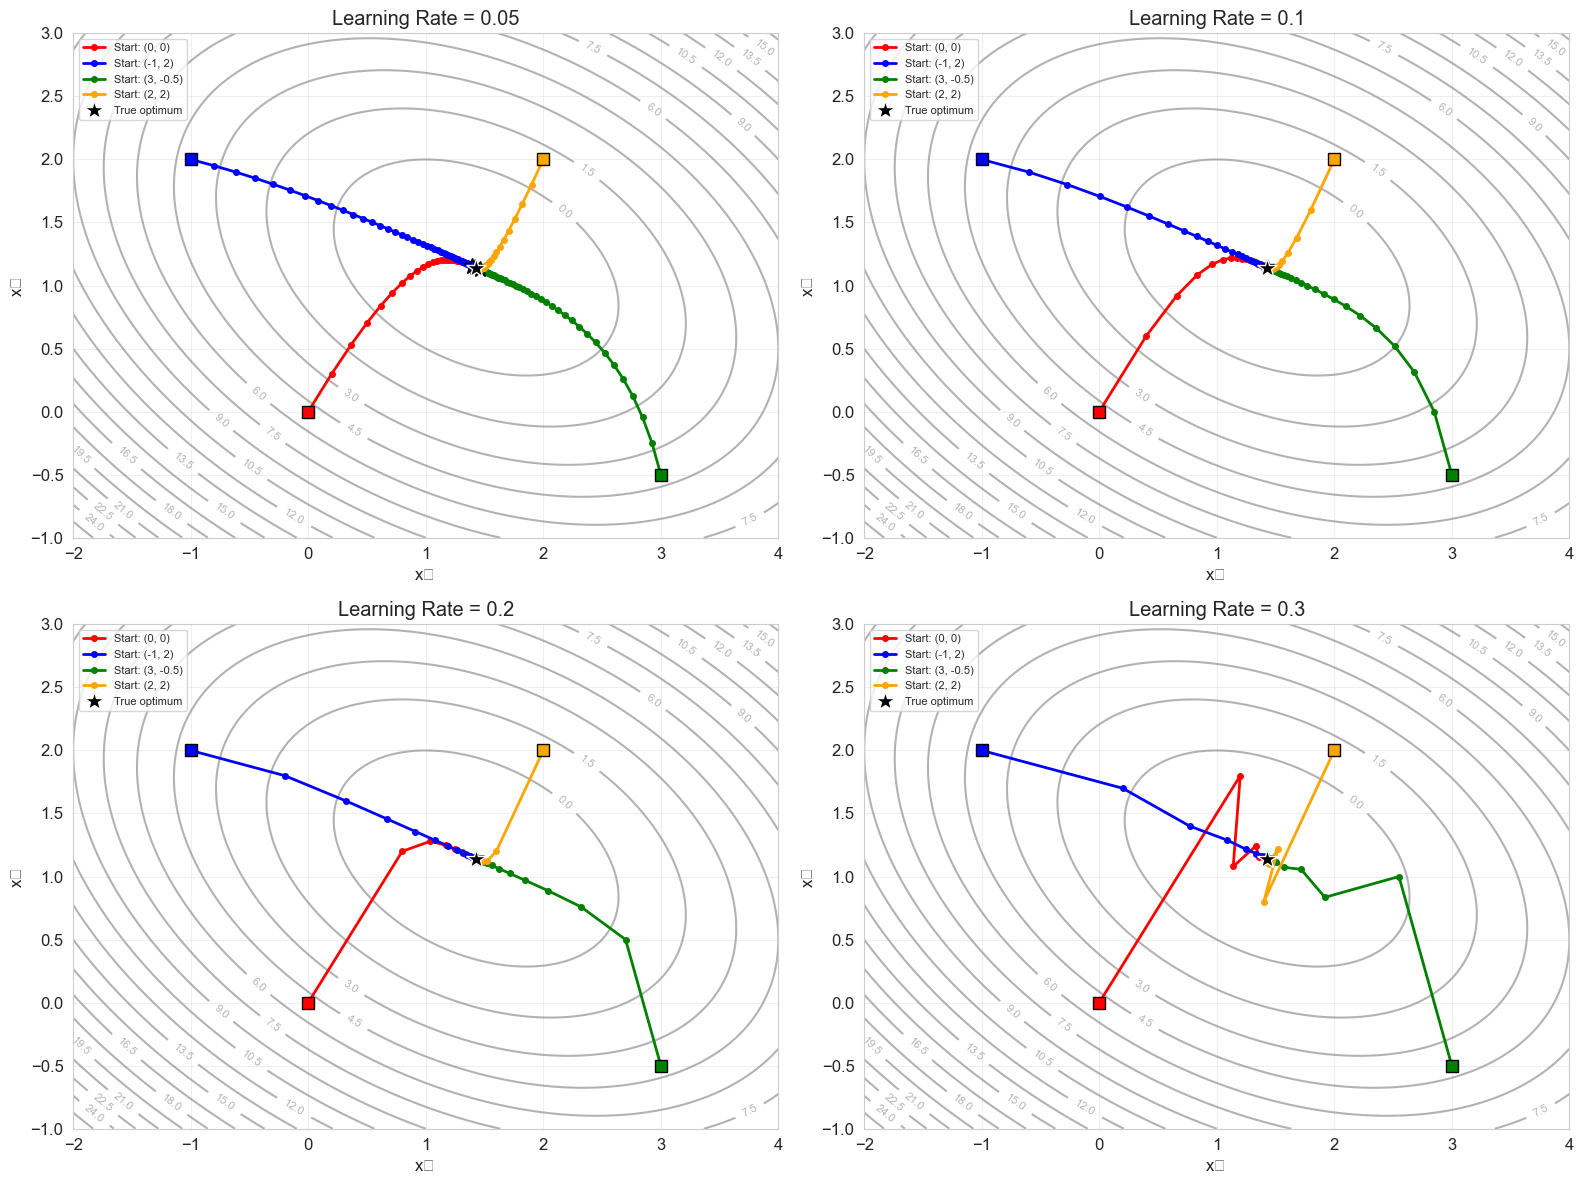

In [13]:
def plot_convergence_2d(f, grad_f, x_init_list, learning_rates, num_iterations=50):
    """
    Vẽ quá trình hội tụ của Gradient Descent trên contour plot
    """
    # Tạo lưới điểm để vẽ contour
    x1_range = np.linspace(-2, 4, 100)
    x2_range = np.linspace(-1, 3, 100)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Z = np.zeros_like(X1)
    
    for i in range(X1.shape[0]):
        for j in range(X1.shape[1]):
            Z[i, j] = f([X1[i, j], X2[i, j]])
    
    # Tạo subplot cho các learning rate khác nhau
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    for idx, lr in enumerate(learning_rates[:4]):
        ax = axes[idx]
        
        # Vẽ contour
        contour = ax.contour(X1, X2, Z, levels=20, alpha=0.6, colors='gray')
        ax.clabel(contour, inline=True, fontsize=8)
        
        # Vẽ đường đi cho các điểm khởi tạo khác nhau
        for i, x_init in enumerate(x_init_list):
            history = gradient_descent_2d(f, grad_f, x_init, lr, num_iterations)
            
            # Chuyển đổi lịch sử thành arrays
            x_path = np.array(history['x'])
            
            # Vẽ đường đi
            ax.plot(x_path[:, 0], x_path[:, 1], 'o-', 
                   color=colors[i % len(colors)], linewidth=2, markersize=4,
                   label=f'Start: ({x_init[0]}, {x_init[1]})')
            
            # Đánh dấu điểm bắt đầu và kết thúc
            ax.plot(x_init[0], x_init[1], 's', color=colors[i % len(colors)], 
                   markersize=8, markeredgecolor='black')
            ax.plot(x_path[-1, 0], x_path[-1, 1], '*', color=colors[i % len(colors)], 
                   markersize=12, markeredgecolor='black')
        
        # Đánh dấu điểm tối ưu thực
        A = np.array([[2, 1], [1, 4]])
        b = np.array([-4, -6])
        x_optimal = np.linalg.solve(A, -b)
        ax.plot(x_optimal[0], x_optimal[1], 'k*', markersize=15, 
               markeredgecolor='white', label='True optimum')
        
        ax.set_title(f'Learning Rate = {lr}')
        ax.set_xlabel('x₁')
        ax.set_ylabel('x₂')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-2, 4)
        ax.set_ylim(-1, 3)
    
    plt.tight_layout()
    plt.show()

# Thử nghiệm với các điểm khởi tạo và learning rate khác nhau
x_init_list = [[0, 0], [-1, 2], [3, -0.5], [2, 2]]
learning_rates = [0.05, 0.1, 0.2, 0.3]

print("Trực quan hóa quá trình hội tụ với các learning rate khác nhau:")
plot_convergence_2d(f2, grad_f2, x_init_list, learning_rates)
